# Final homework

*Akademia Leona Kozminskiego*
#### Descriptive Statistics


*Prof.* Katarzyna Piotrowska <br>
*Student* Alejandro Guzmán Rivera (*23-DS*)

**Instructions** <br>

A simple quantitative, explanatory research (for 5: with the theory-based justification of the hypothesis i.e. literature review with references etc.). At least one variable on the qualitative level of measurement (categorical or ordinal) and one on the quantitative (interval or ratio) level of measurement.<br>

1. Research question and hypothesis (if applicable) – is the research descriptive or explanatory?
2. Variables’ definitions (conceptualisation)
3. Operationalisation (variables’ indicators, their levels and levels of measurement)
4. Subject of the study: observation unit
5. Data collection procedure
6. Data analysis
7. Sample description
8. Bivariate and/or multivariate analyses (at least two different) with the justification of the choice of
the method and interpretation of the results
9. The purpose of use descriptive statistics (sample description, the answer to research question, other)
10. Conclusions/discussion

## 1. Research question

* What is the impact of crops production in Poland in Greenhouse Gasses (GHG), specifically Nitrous Oxide through the period 1961-2019? 

## 2. Hypothesis

* There is a positive correlation between Cereals, Roots and Tubers and Potatoes production and Nitrous Oxide (N2O) emissions in Poland during the period 1971 to 2018.

## 3. Variables definition

In [117]:
variables_defi = {"y": ["Nitrous Oxide emissions"], 
                  "x1": ["Cereals production"] ,
                  "x2": ["Roots and Tubers production"],
                  "x3": ["Potatoes production"]}
print(tabulate(variables_defi, headers="keys", tablefmt="fancy_grid"))

╒═════════════════════════╤════════════════════╤═════════════════════════════╤═════════════════════╕
│ y                       │ x1                 │ x2                          │ x3                  │
╞═════════════════════════╪════════════════════╪═════════════════════════════╪═════════════════════╡
│ Nitrous Oxide emissions │ Cereals production │ Roots and Tubers production │ Potatoes production │
╘═════════════════════════╧════════════════════╧═════════════════════════════╧═════════════════════╛


## 4. Subject of study

Nitrous Oxide (N2O) emissions according to crops production.

## 5. Data collection procedure

### 5.1 Crop production data collection procedure

#### 5.1.1 Importing libraries

In [208]:
# Tables creation
from tabulate import tabulate

# Tables manipulation and numbers formatting
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Statistical analysis
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf  

# Graphics creation and aesthetics
import seaborn as sns
sns.set()


#### 5.1.2 Importing the crops dataset

The dataset was obtained from *data.world* which in turn, was taken from the Food and Agriculture Organization of the United Nations (FAO). Specifically, the crop production dataset was taken, which contains statistics of 173 farm products around the world. The original dataset was filtered using SQL by area code, in this case "173" that corresponds to Poland. <br>

In [119]:
data_crops = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1961-crop-production-in-Poland-QueryResult.csv")

#### 5.1.3 Revealing the characteristics of the variables in the dataset.

In [120]:
data_crops.columns

Index(['area_code', 'area', 'item_code', 'item', 'element_code', 'element',
       'unit', 'y1971', 'y1972', 'y1973', 'y1974', 'y1975', 'y1976', 'y1977',
       'y1978', 'y1979', 'y1980', 'y1981', 'y1982', 'y1983', 'y1984', 'y1985',
       'y1986', 'y1987', 'y1988', 'y1989', 'y1990', 'y1991', 'y1992', 'y1993',
       'y1994', 'y1995', 'y1996', 'y1997', 'y1998', 'y1999', 'y2000', 'y2001',
       'y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007', 'y2008', 'y2009',
       'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015', 'y2016', 'y2017',
       'y2018'],
      dtype='object')

In [121]:
data_crops_charact = ([["Variable", "Description"],
                        ['area_code', "173"], 
                        ['area', "Poland"], 
                        ['item_code', "Product code"], 
                        ['item', "Product name"], 
                        ['element_code',"Code of the element"], 
                        ['element',"Type of production: Production, area harvested, yield"], 
                        ['unit',"Unit of measurement: tonnes, Ha, Hg/Ha"], 
                        ['year',"Years (1961-2019)"]])

In [122]:
print(tabulate(data_crops_charact, headers= "firstrow", tablefmt='fancy_grid'))

╒══════════════╤═══════════════════════════════════════════════════════╕
│ Variable     │ Description                                           │
╞══════════════╪═══════════════════════════════════════════════════════╡
│ area_code    │ 173                                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ area         │ Poland                                                │
├──────────────┼───────────────────────────────────────────────────────┤
│ item_code    │ Product code                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ item         │ Product name                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ element_code │ Code of the element                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ element      │ Type of production: Production, ar

In [123]:
vars_crops_charact =    ([["Variable", "Type", "Level"],
                        ['area_code', "Integer", "Nominal"], 
                        ['area', "String", "Nominal"], 
                        ['item_code', "Integer", "Nominal"], 
                        ['item', "String", "Nominal"], 
                        ['element_code',"Integer", "Nominal"], 
                        ['element',"String", "Nominal"], 
                        ['unit',"String", "Nominal"], 
                        ['year',"String/Float", "Ratio"]])

In [124]:
print(tabulate(vars_crops_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤══════════════╤═════════╕
│ Variable     │ Type         │ Level   │
╞══════════════╪══════════════╪═════════╡
│ area_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ area         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element_code │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element      │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ unit         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ year         │ String/Float │ Ratio   │
╘══════════════╧══════════════╧═════════╛


#### 5.1.4 Cleaning process of the "data_crops" dataset

##### 5.1.4.1 Checking for NAN values

In [125]:
data_crops.isna()

,area_code,area,item_code,item,element_code,element,unit,y1971,y1972,y1973,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
0,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
277,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
279,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### 5.1.4.2 Replacing NAN with 0

In [126]:
data_crops.replace(np.nan, 0)

,area_code,area,item_code,item,element_code,element,unit,y1971,y1972,y1973,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
0,173,Poland,221,"Almonds, with shell",5312,Area harvested,ha,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,173,Poland,221,"Almonds, with shell",5510,Production,tonnes,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,173,Poland,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,173,Poland,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,"3,400.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,173,Poland,515,Apples,5312,Area harvested,ha,0.00,0.00,0.00,...,"173,607.00","170,443.00","183,526.00","194,680.00","193,439.00","176,335.00","180,399.00","177,203.00","176,352.00","166,150.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,173,Poland,1729,"Treenuts, Total",5419,Yield,hg/ha,0.00,0.00,0.00,...,"6,873.00","3,734.00","4,637.00","8,406.00","19,370.00","18,345.00","20,716.00","19,529.00","12,926.00","25,075.00"
277,173,Poland,1729,"Treenuts, Total",5510,Production,tonnes,0.00,0.00,0.00,...,"15,650.00","12,187.00","13,930.00","16,993.00","13,594.00","12,467.00","12,502.00","12,741.00","8,353.00","15,120.00"
278,173,Poland,1735,Vegetables Primary,5312,Area harvested,ha,"233,905.00","200,454.00","238,313.00",...,"212,151.00","165,970.00","184,480.00","181,070.00","148,478.00","178,360.00","181,445.00","184,337.00","183,441.00","191,705.00"
279,173,Poland,1735,Vegetables Primary,5419,Yield,hg/ha,"152,635.00","184,122.00","171,518.00",...,"273,983.00","308,092.00","314,489.00","312,919.00","352,941.00","329,477.00","279,425.00","319,869.00","327,189.00","287,097.00"


##### 5.1.4.3 Describing **data_crops** Dataset

In [127]:
print(data_crops.describe())

       area_code  item_code  element_code         y1971         y1972  \
count     281.00     281.00        281.00        139.00        137.00   
mean      173.00     549.43      5,413.57  1,337,679.62  1,517,007.68   
std         0.00     485.83         84.36  5,291,723.22  6,359,745.23   
min       173.00      15.00      5,312.00          0.00      2,000.00   
25%       173.00     234.00      5,312.00     17,333.50     15,597.00   
50%       173.00     423.00      5,419.00     58,100.00     55,500.00   
75%       173.00     554.00      5,510.00    344,950.00    327,420.00   
max       173.00   1,841.00      5,510.00 39,801,104.00 48,735,408.00   

              y1973         y1974         y1975         y1976         y1977  \
count        137.00        137.00        137.00        136.00        134.00   
mean   1,581,959.62  1,523,738.79  1,499,987.72  1,581,047.73  1,451,646.66   
std    6,725,453.28  6,360,684.95  6,115,782.55  6,532,992.92  5,603,411.45   
min        2,000.00      2

##### 5.1.4.4 Grouping **data_crops** dataset by item

In [128]:
dataCropsGrouped = data_crops.groupby(["item"]).sum()

In [129]:
dataCropsGrouped = dataCropsGrouped.drop(columns=["area_code", "item_code", "element_code"])

In [257]:
dataCropsGrouped.head()

,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
item,,,,,,,,,,,,,,,,,,,,,
"Almonds, with shell",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"Anise, badian, fennel, coriander","3,400.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Apples,"563,200.00","558,500.00","682,500.00","594,300.00","840,722.00","1,160,890.00","911,928.00","1,030,343.00","1,050,671.00","844,106.00",...,"2,951,157.00","2,158,527.00","2,812,447.00","3,219,814.00","3,437,999.00","3,552,840.00","3,524,873.00","3,984,872.00","2,756,184.00","4,406,387.00"
Apricots,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"35,862.00","25,295.00","29,499.00","25,704.00","34,849.00","34,003.00","38,043.00","32,657.00","15,110.00","41,683.00"
Artichokes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##### 5.1.4.5 Checking for the most important crops from **dataCropsGrouped** dataset

In [131]:
dataCropsGroupedSum = dataCropsGrouped.sum(axis=1)

In [132]:
dataCropsGroupedSum.sort_values(ascending=False)

item
Cereals, Total            1,583,068,952.00
Roots and Tubers, Total   1,334,122,051.00
Potatoes                  1,334,122,051.00
Sugar Crops Primary         682,033,347.00
Sugar beet                  682,033,347.00
                                ...       
Sorghum                               0.00
Figs                                  0.00
Eggplants (aubergines)                0.00
Cranberries                           0.00
Almonds, with shell                   0.00
Length: 102, dtype: float64

The most prolific crop products produced in Poland between 1961 and 2019 are:

1. Cereals                                 1,866,275,855.00
2. Roots and Tubers                        1,828,499,656.00
3. Potatoes                                1,828,499,656.00


##### 5.1.4.6 Deleting all the rows with 0 sum

In [133]:
cleanDataCrops = dataCropsGroupedSum.loc[~(dataCropsGroupedSum == 0)]

##### 5.1.4.7 Calculating mean and median

In [134]:
print(f"The mean is: {dataCropsGroupedSum.mean()}")
print(f"The median is: {dataCropsGroupedSum.median()}")

The mean is: 83768657.25490196
The median is: 2892161.0


##### 5.1.4.8 Getting all the rows above the median value (3,513,392.5)

In [135]:
ImportantDataCrops = cleanDataCrops[cleanDataCrops > 3513392.5]

In [136]:
ImportantDataCrops.sort_values(ascending=False)

item
Cereals, Total                       1,583,068,952.00
Potatoes                             1,334,122,051.00
Roots and Tubers, Total              1,334,122,051.00
Sugar beet                             682,033,347.00
Sugar Crops Primary                    682,033,347.00
Wheat                                  481,914,327.00
Rye                                    357,267,735.00
Vegetables Primary                     272,225,930.00
Barley                                 223,207,509.00
Grain, mixed                           193,430,115.00
Fruit Primary                          144,404,694.00
Triticale                              134,487,774.00
Oats                                   128,929,791.00
Apples                                  94,693,448.00
Oilcrops                                90,830,209.00
Cabbages and other brassicas            89,368,578.00
Rapeseed                                86,585,212.00
Maize                                   66,068,760.00
Oilcrops, Cake Equivale

##### 5.1.4.9 Removing all rows with 0 values from the **dataCropsCleaned** dataset

In [137]:
dataCropsCleaned = dataCropsGrouped.loc[~(dataCropsGrouped == 0).all(axis=1)]

##### 5.1.4.10 Transposing the **dataCropsCleaned** dataset

In [138]:
dataCropsTransposed = dataCropsCleaned.transpose()

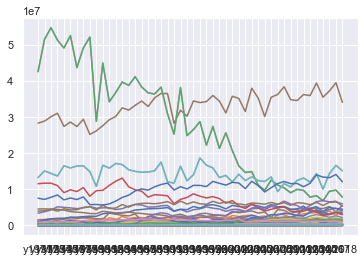

In [139]:
plt.plot(dataCropsTransposed)

#### 5.1.5 Plotting **dataCropsTransposed**

In [247]:
dataCropsTransposed.to_csv("dataCropsTransposed.csv", index=False, header=True)

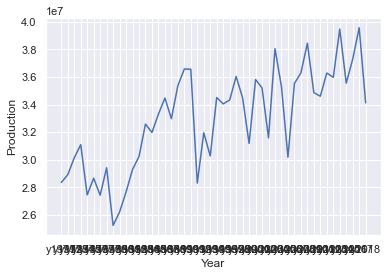

In [203]:
#Plotting cereals
plt.plot(dataCropsTransposed["Cereals, Total"])
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

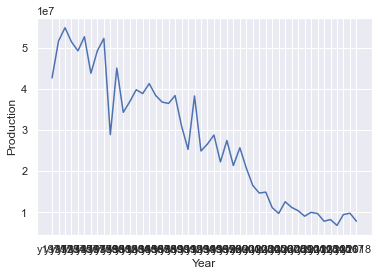

In [202]:
#Ploting "Roots and Tubers, Total"
plt.plot(dataCropsTransposed["Roots and Tubers, Total"])
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

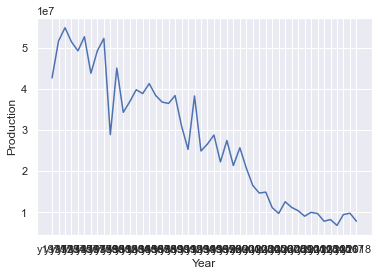

In [204]:
#Plotting "Potatoes"
plt.plot(dataCropsTransposed["Potatoes"])
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

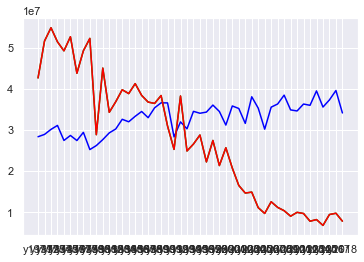

In [144]:
# Plotting the three together
plt.plot(dataCropsTransposed["Cereals, Total"], color = 'blue')
plt.plot(dataCropsTransposed["Roots and Tubers, Total"], color = "green")
plt.plot(dataCropsTransposed["Potatoes"], color = 'red')

### 5.2 GHG emission data collection procedure

The datasets of Nitrous Oxide (N2O), Methane (CH4) and Carbon dioxide (CO2), were gathered from the *databank.worldbank.org*. Those datasets were filtered using the the tools provided by the website itself to include only Poland from the period from 1971 to 2019.

#### 5.2.1 Loading the dataset

In [167]:
# Loading Nitrous Oxide (N2O) dataset
data_nitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-nitrous-TRANSPOSED-Poland.csv", index_col=None)

#### 5.2.2 Describing the N20 dataset

In [168]:
data_nitrox.columns

Index(['Year', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], dtype='object')

In [71]:
vars_ghg_charact = ([["Variable", "Description", "Type", "Level"],
                     ["Series Name", "Nitrous Oxide", "String", "Nominal"],
                     ["Series Code", "Code of the series", "String", "Nominal"],
                     ["Country Name", "Poland", "String", "Nominal"],
                     ["Country Code", "POL", "String", "Nominal"],
                     ["Year", "From 1971 to 2019", "Float", "Ratio"]])

In [169]:
print(tabulate(vars_ghg_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤════════════════════╤════════╤═════════╕
│ Variable     │ Description        │ Type   │ Level   │
╞══════════════╪════════════════════╪════════╪═════════╡
│ Series Name  │ Nitrous Oxide      │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Series Code  │ Code of the series │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Country Name │ Poland             │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Country Code │ POL                │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Year         │ From 1971 to 2019  │ Float  │ Ratio   │
╘══════════════╧════════════════════╧════════╧═════════╛


In [170]:
data_nitrox.describe()

,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
count,48.00
mean,"30,026.39"
std,"8,996.23"
min,"20,500.00"
25%,"23,230.00"
50%,"24,595.00"
75%,"38,085.51"
max,"46,495.35"


#### 5.2.3 Preparing **data_nitrox** dataset for plotting

In [149]:
pd.to_numeric(data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"])

0    37,691.04
1    38,576.71
2    43,345.13
3    45,306.19
4    46,495.35
5    45,570.62
6    45,052.30
7    45,157.70
8    43,692.33
9    42,734.12
10   39,221.51
11   38,505.41
12   38,738.53
13   37,945.55
14   36,851.87
15   37,214.88
16   36,149.10
17   36,435.54
18   35,743.00
19   24,920.00
20   24,010.00
21   23,110.00
22   23,780.00
23   24,040.00
24   24,550.00
25   24,600.00
26   25,110.00
27   23,650.00
28   23,270.00
29   23,720.00
30   23,500.00
31   23,040.00
32   23,670.00
33   23,760.00
34   24,590.00
35   24,670.00
36   25,570.00
37   24,350.00
38   21,020.00
39   21,740.00
40   21,420.00
41   21,890.00
42   21,030.00
43   20,500.00
44   20,680.00
45   21,620.00
46   21,550.00
47   21,480.00
Name: Nitrous oxide emissions (thousand metric tons of CO2 equivalent), dtype: float64

#### 5.2.4 Plotting **data_nitrox**

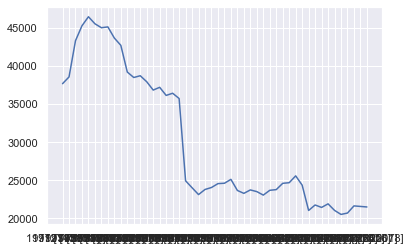

In [171]:
plt.plot(data_nitrox["Year"], data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"])

## 6. Data analysis

To analyze the data, it was required to create a correlation analysis.

#### 6.1 Bivariate analysis

##### 6.1.1 Scatter plot  and Regression: N2O vs Cereals

In [190]:
y = data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"].tolist()
x1 = dataCropsTransposed["Cereals, Total"].tolist()

C:\Users\USER\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


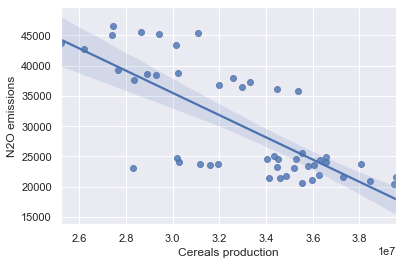

In [206]:
sns.regplot(x1, y)
plt.xlabel("Cereals production")
plt.ylabel("N2O emissions")
plt.show()

In [193]:
X_cereals = sm.add_constant(x1)
results_cereals = sm.OLS(y,X_cereals).fit()
results_cereals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     56.57
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.51e-09
Time:                        11:38:58   Log-Likelihood:                -485.38
No. Observations:                  48   AIC:                             974.8
Df Residuals:                      46   BIC:                             978.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.057e+04   8097.572     11.185      0.000    7.43e+04    1.07e+05
x1            -0.0018      0.000     -7.521      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        0.590   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.580
Skew:                          -0.245   Prob(JB):                        0.748
Kurtosis:                       2.776   Cond. No.                     3.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 6.1.2 Scatter plot and Regression: Nitrox vs Roots and Tubers

In [195]:
x2 = dataCropsTransposed["Roots and Tubers, Total"].tolist()

C:\Users\USER\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


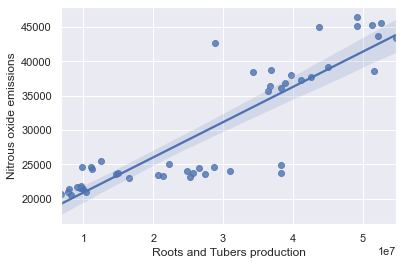

In [205]:
sns.regplot(x2, y)
plt.xlabel("Roots and Tubers production")
plt.ylabel("Nitrous oxide emissions")
plt.show()

In [197]:
X_RootsTubers = sm.add_constant(x2)
results_RootsTubers = sm.OLS(y, X_RootsTubers).fit()
results_RootsTubers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     150.6
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           4.13e-16
Time:                        11:53:30   Log-Likelihood:                -469.77
No. Observations:                  48   AIC:                             943.5
Df Residuals:                      46   BIC:                             947.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.58e+04   1322.186     11.946      0.000    1.31e+04    1.85e+04
x1             0.0005   4.17e-05     12.271      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.151   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.277
Skew:                          -0.379   Prob(JB):                        0.194
Kurtosis:                       4.031   Cond. No.                     6.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 6.1.3 Scatter plot and Regression: Nitrox vs Potatoes

In [198]:
x3 = dataCropsTransposed["Potatoes"].tolist()

C:\Users\USER\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


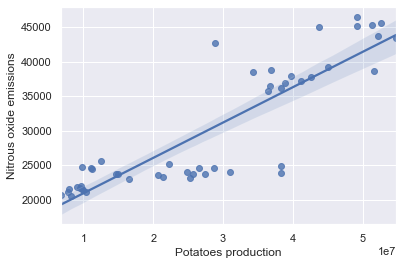

In [207]:
sns.regplot(x3, y)
plt.xlabel("Potatoes production")
plt.ylabel("Nitrous oxide emissions")
plt.show()

In [200]:
X_Potatoes = sm.add_constant(x3)
results_Potatoes = sm.OLS(y, X_Potatoes).fit()
results_Potatoes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     150.6
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           4.13e-16
Time:                        11:55:46   Log-Likelihood:                -469.77
No. Observations:                  48   AIC:                             943.5
Df Residuals:                      46   BIC:                             947.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.58e+04   1322.186     11.946      0.000    1.31e+04    1.85e+04
x1             0.0005   4.17e-05     12.271      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.151   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.277
Skew:                          -0.379   Prob(JB):                        0.194
Kurtosis:                       4.031   Cond. No.                     6.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 6.2 Multiple variables analysis

A new file was created in RStudio. This file contains the two datasets merged.

In [259]:
CropsNitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\CropsNitrox.csv")

In [274]:
CropsNitrox.describe()

,Nitrous.oxide.emissions..thousand.metric.tons.of.CO2.equivalent.,Cereals..Total,Roots.and.Tubers..Total,Potatoes
count,48.00,48.00,48.00,48.00
mean,"30,026.39","32,980,603.17","27,794,209.40","27,794,209.40"
std,"8,996.23","3,639,354.81","15,377,540.62","15,377,540.62"
min,"20,500.00","25,234,198.00","6,824,231.00","6,824,231.00"
25%,"23,230.00","30,170,408.00","11,184,625.75","11,184,625.75"
50%,"24,595.00","34,084,246.00","27,010,621.50","27,010,621.50"
75%,"38,085.51","35,616,846.50","39,051,279.75","39,051,279.75"
max,"46,495.35","39,568,956.00","54,800,486.00","54,800,486.00"


In [260]:
CropsNitrox.head()

,Year,Nitrous.oxide.emissions..thousand.metric.tons.of.CO2.equivalent.,Cereals..Total,Roots.and.Tubers..Total,Potatoes
0,1971 [YR1971],"37,691.04",28346210,42619605,42619605
1,1972 [YR1972],"38,576.71",28911646,51574900,51574900
2,1973 [YR1973],"43,345.13",30132506,54800486,54800486
3,1974 [YR1974],"45,306.19",31093909,51383477,51383477
4,1975 [YR1975],"46,495.35",27446629,49189801,49189801


In [261]:
CropsNitrox.columns

Index(['Year',
       'Nitrous.oxide.emissions..thousand.metric.tons.of.CO2.equivalent.',
       'Cereals..Total', 'Roots.and.Tubers..Total', 'Potatoes'],
      dtype='object')

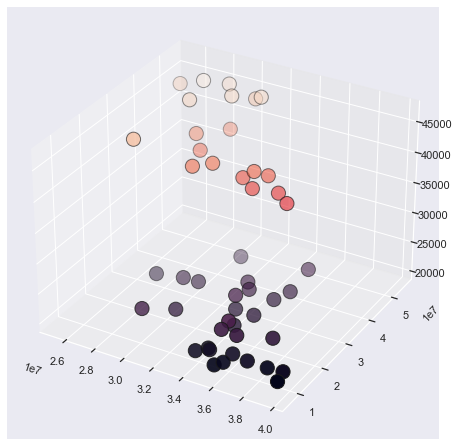

In [273]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

x1_Cereals = CropsNitrox["Cereals..Total"]
x2_RnT = CropsNitrox['Roots.and.Tubers..Total']
x3_Potatoes = CropsNitrox['Potatoes']
y_ntwoo = CropsNitrox['Nitrous.oxide.emissions..thousand.metric.tons.of.CO2.equivalent.']

ax.scatter(x1_Cereals, x3_Potatoes, y_ntwoo, 
           edgecolor = "k",
           s= 200,
           c= y_ntwoo)

In [268]:
regMultiNitrox = smf.ols("y_ntwoo ~ x1_Cereals + x2_RnT + x3_Potatoes", 
                         data = CropsNitrox).fit()

In [269]:
regMultiNitrox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_ntwoo   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     92.76
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.09e-16
Time:                        21:39:54   Log-Likelihood:                -465.41
No. Observations:                  48   AIC:                             936.8
Df Residuals:                      45   BIC:                             942.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.083e+04   8458.901      4.827      0.000    2.38e+04    5.79e+04
x1_Cereals     -0.0007      0.000     -2.991      0.004      -0.001      -0.000
x2_RnT      -1.512e-05   6.74e-05     -0.224      0.824      -0.000       0.000
x3_Potatoes     0.0004   2.99e-05     14.034      0.000       0.000       0.000
==============================================================================
Omnibus:                        5.907   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.172
Skew:                          -0.797   Prob(JB):                       0.0753
Kurtosis:                       3.212   Cond. No.                     3.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 7. Discussion